# Part 3- Prediction

Import all libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

##  3.1 Write a function called predict_future(‘Region’,’Segment’) which, when called, would perform the following activity:
>1. Predict “Level 5” future values for the next 6 months, given the parameters of the function. (Please make sure the parameters have default values in place) Also, plot it.
>2. Generates the MAPE and RMSE of your prediction of the year 2022, 2021 & 2020 for the given parameters.  

Plot a line graph of the level 5 actual numbers from 2020-2022 & in the same graph, there should be the predicted numbers for 2023. The x-axis should be the timeline from 2020 Jan to 2023 Jun and the y-axis should be the value of the level 5 column and predicted values. You may use Rolling Average and ARIMA for forecasting. (link for reference: 
https://youtu.be/jiQM93dmUek)



Load the data

In [8]:
# Reading the dataset
df = pd.read_csv("../data/createdDataFrame.csv")

# Displaying the data
df.head()

,Year,Month,Segment,Region,KPI,Value Type,Value
0,2020,12,Clients,India,Lv1_Visitors,Actuals,36.65558
1,2020,12,Clients,India,Lv2_Visitors,Actuals,26.89569
2,2020,12,Clients,India,Lv3_Visitors,Actuals,13.00571
3,2020,12,Clients,India,Lv4_Visitors,Actuals,7.17608
4,2020,12,Clients,India,Lv3_Visitors,Actuals,7.06677


### 3.1.1 Predict “Level 5” future values for the next 6 months, given the parameters of the function. (Please make sure the parameters have default values in place) Also, plot it.

In [10]:
# select level_5 values from data
df_lv5 = df[df["KPI"]=="Lv5_Visitors"]



df_lv5.head()

,Year,Month,Segment,Region,KPI,Value Type,Value
5,2020,12,Clients,India,Lv5_Visitors,Actuals,2.55723
7,2020,12,Clients,India,Lv5_Visitors,Actuals,0.74768
13,2021,12,Clients,India,Lv5_Visitors,Actuals,2.16178
15,2021,12,Clients,India,Lv5_Visitors,Actuals,0.69345
31,2022,12,Clients,India,Lv5_Visitors,Actuals,0.75211


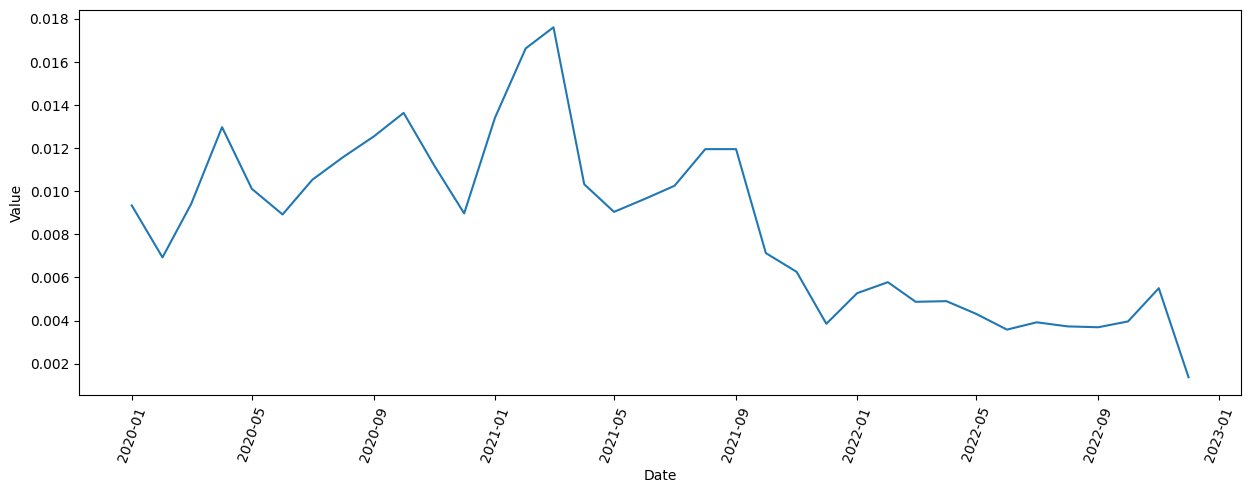

In [46]:
region="Aurangabad"
segment="Customers"


def predict_future(region,segment):
    test_df = df_lv5[(df_lv5["Region"]==region) & (df_lv5["Segment"]==segment)]
    test_df = test_df[["Year","Month","Value"]].groupby(by=["Year","Month"]).sum()
    test_df = test_df.reset_index()

    test_df['Date'] = pd.to_datetime(test_df[['Year', 'Month']].assign(DAY=1))

    test_df = test_df[["Date","Value"]]

    # return test_df
    plt.figure(figsize=(15,5))
    sns.lineplot(test_df, x="Date", y="Value")
    plt.xticks(rotation=70)

res = predict_future(region=region, segment=segment)

res